# 03a - BigQuery Machine Learning (BQML) - Machine Learning with SQL
BigQuery has a number of machine learning algorithms callable directly from SQL. This gives the convenience of using the common language of SQL to "CREATE MODEL …). The library of available models is constantly growing and covers supervised, unsupervised, and time series methods as well as functions for evaluation - even anomaly detection from results, explainability and hyperparameter tuning. 
In this demonstration, BigQuery ML (BQML) is used to create a logistic regression model.

### Prerequisites:
- 01 - BigQuery - Table Data Source
### Overview:
- Train logistic regression model with BQML
    - CREATE MODEL …. model_type="LOGISTIC_REG"
- Review training information
    - SELECT * FROM ML.TRAINING_INFO…
- Evaluated the models performance
    - SELECT * FROM ML.EVALUATE…
- Review the classification errors with a confusion matrix
    - SELECT * FROM ML.CONFUSION_MATRIX…
- Create prediction for data in BigQuery
    - SELECT * FROM ML.PREDICT

---
## Setup

inputs:

In [2]:
REGION = 'us-central1'
PROJECT_ID='nguyen_demo5'
DATANAME = 'taxi'
NOTEBOOK = '03a'

# Model Training
VAR_TARGET = 'tips_label'
VAR_OMIT = ' unique_key taxi_id trip_start_timestamp trip_end_timestamp trip_seconds trip_miles pickup_census_tract dropoff_census_tract pickup_community_area dropoff_community_area fare tips tolls extras trip_total payment_type company pickup_latitude pickup_longitude pickup_location dropoff_latitude dropoff_longitude dropoff_location ' # add more variables to the string with space delimiters

packages:

In [3]:
from google.cloud import bigquery

clients:

In [4]:
bigquery = bigquery.Client()

---
## Train Model
Use BigQuery ML to train multiclass logistic regression model:
- This uses the splits column that notebook 01 created
-data_split_method = CUSTOM uses the column in data_split_col to assign training data for FALSE - values and evaluation data for TRUE values.

### Training the binary logistic regression model VERSION 1: taxi_lr_v1
- Using only `trips_seconds` variable
- `VAR_OMIT_V1`: contain all of the variables except variable `trips_seconds' 

In [6]:
VAR_OMIT_V1= 'unique_key taxi_id trip_start_timestamp trip_end_timestamp trip_miles pickup_census_tract dropoff_census_tract pickup_community_area dropoff_community_area fare tips tolls extras trip_total payment_type company pickup_latitude pickup_longitude pickup_location dropoff_latitude dropoff_longitude dropoff_location'

In [7]:
query = f"""
CREATE OR REPLACE MODEL `{DATANAME}.{DATANAME}_lr_v1`
OPTIONS
    (model_type = 'LOGISTIC_REG',
        auto_class_weights = TRUE,
        input_label_cols = ['{VAR_TARGET}'],
        data_split_col = 'custom_splits',
        data_split_method = 'CUSTOM'
    ) AS
SELECT * EXCEPT({','.join(VAR_OMIT_V1.split())}, splits),
    CASE
        WHEN splits = 'TRAIN' THEN FALSE
        ELSE TRUE
    END AS custom_splits
FROM `{DATANAME}.{DATANAME}_prepped`
WHERE splits != 'TEST'
"""
job = bigquery.query(query = query)
job.result()

In [ ]:
(job.ended-job.started).total_seconds()

#### Evaluation:
- At the end of the training, we can access the ML model from the BigQuery
navigation menu to have a look at the performance of the model. Selecting the
Evaluation tab, we can see the ROC AUC value. 
- In this case, we can see we haven't achieved great results because it is not close to 1; it's 0.5696
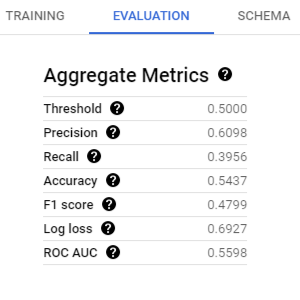

- In the same tab, we can also see the ROC curve:

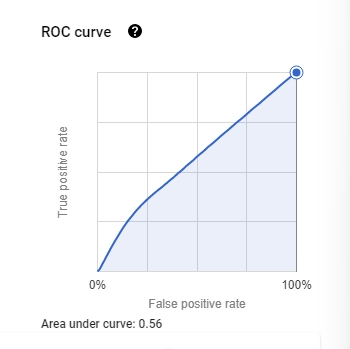
- As we can see from the preceding diagram, the ROC curve, which expresses the
rate between the true positive and the false positive, is not close to 1. The blue area
under the curve is about 50% of the entire square.
- As shown in the following screenshot, we can also leverage the confusion matrix
in the same tab to experiment with the outcome of the ML model according to
different thresholds:
| Score threshold | Confusion matrix |
| --- | ----------- |
| 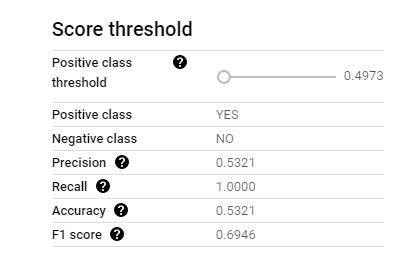 | 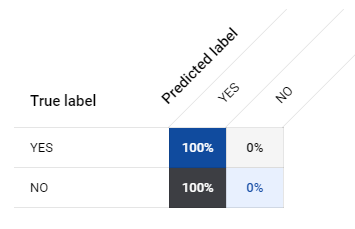 |